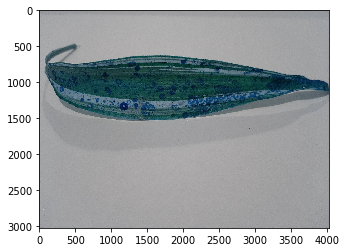

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle
import math

DATADIR = "C:/Users/Vindula/Desktop/Create a DL app with flutter/Datasets/sandriana_leaf"
CATEGORIES = ["des1", "des3"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # paths to dir
    for img in os.listdir(path):
        
        #img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        
        img_array = cv2.imread(os.path.join(path, img))
        img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        # ret,threshed_img = cv2.threshold(img_array,105,255,cv2.THRESH_TRUNC)
        plt.imshow(img_array)
        
        # plt.imshow(img_array, cmap = "gray", vmin=0, vmax=180)
        #plt.subplot(2,3,i+1),plt.imshow(threshed_img,'gray')
        
        plt.show()
        break
    break

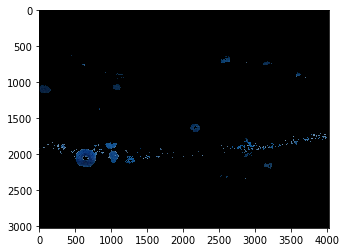

In [19]:
img = cv2.imread("C:/Users/Vindula/Desktop/Create a DL app with flutter/Datasets/sandriana_leaf/des1/20191217_161737.jpg")

#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Method 1
# mask = cv2.inRange(hsv, (12, 190, 10), (25, 255, 255))
# ## slice the green
# imask = mask>0
# green = np.zeros_like(img, np.uint8)
# green[imask] = img[imask]

# Method 2
low_red = (4, 100, 15)
high_red = (16, 255, 200)
red_mask = cv2.inRange(hsv, low_red, high_red)
red = cv2.bitwise_and(img, img, mask=red_mask)
# plt.subplot(1, 2, 1)
# plt.imshow(mask, cmap="gray")
# plt.subplot(1, 2, 2)
# plt.imshow(result)
# plt.show()
# plt.subplot(1, 2, 1)
# plt.imshow(img)
# plt.subplot(1, 2, 2)
# plt.imshow(hsv)
                
plt.imshow(red)
plt.show()

In [100]:
print(threshed_img)

[[105 105 105 ... 105 105 105]
 [105 105 105 ... 105 105 105]
 [105 105 105 ... 105 105 105]
 ...
 [105 105 105 ... 105 105 105]
 [105 105 105 ... 105 105 105]
 [105 105 105 ... 105 105 105]]


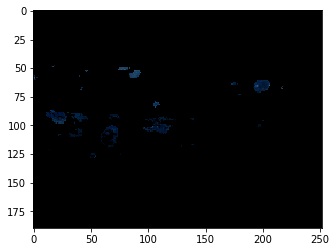

In [20]:
aspect_ratio = 1.33
img_weight = 252
low_brown = (8, 100, 20)
high_brown = (16, 255, 200)
img_height = math.ceil(img_weight / aspect_ratio)

img = cv2.imread("C:/Users/Vindula/Desktop/Create a DL app with flutter/Datasets/sandriana_leaf/des1/20191217_164329.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
brown_mask = cv2.inRange(hsv, low_brown, high_brown)
brown = cv2.bitwise_and(img, img, mask=brown_mask)
new_array = cv2.resize(brown, (img_weight, img_height))     
plt.imshow(new_array, cmap = "binary")
plt.show()

In [7]:
#Creating dataset

training_data = []

def create_traing_data():
    
    low_brown = (8, 100, 20)
    high_brown = (16, 255, 200)
    aspect_ratio = 1.33
    img_weight = 252
    img_height = math.ceil(img_weight / aspect_ratio)
    
    for category in CATEGORIES:
        # paths to dir
        path = os.path.join(DATADIR, category)
        # 0 for category 1; 1 for category 2
        # As an example 0 for category 1 ; 1 for category 2
        class_num = CATEGORIES.index(category)
        
        for img in os.listdir(path):
            try:   
                img = cv2.imread(os.path.join(path, img))
                hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
                brown_mask = cv2.inRange(hsv, low_brown, high_brown)
                brown = cv2.bitwise_and(img, img, mask=brown_mask)
                new_array = cv2.resize(brown, (img_weight, img_height)) 
                training_data.append([new_array, class_num]) 
            except Exception as e:
                pass
            
create_traing_data()

In [10]:
print(len(training_data))

763


In [11]:
random.shuffle(training_data)

In [12]:
# check index are ok
for sample in training_data[:10]:
    print(sample[1])

0
1
0
1
0
1
0
1
0
1


In [13]:
# feature set
X = []

# lowercase for lables
y = []

In [14]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
# when passing  to the network X should be converted to a numpy array
# -1 is just how many features --> meaning any number in here
# 1 is because this is gray scaled image --> one dimention color
X = np.array(X).reshape(-1, img_weight, img_height, 3)

In [15]:
# saving our dataset

pickle_out = open("Xleaf.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("yleaf.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [16]:
pickle_in = open("Xleaf.pickle", "rb")
X = pickle.load(pickle_in)
pickle_out.close()

In [17]:
X[1]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

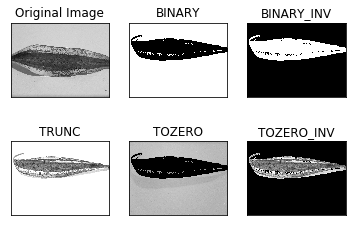

In [109]:
# geeks for geeks Not for making dataset part
img = cv2.imread('C:/Users/Vindula/Desktop/Create a DL app with flutter/Datasets/sandriana_leaf/des1/20191217_181158.jpg',0)
ret,thresh1 = cv2.threshold(img_array,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img_array,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img_array,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img_array,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img_array,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()